In [39]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import glob
import CoolProp as cp
from IPython.display import Latex

# Ejemplo 1 Combustion de gas 

| **Parámetro**                            | **Valor**                              |
|------------------------------------------|----------------------------------------|
| Geometría Hogar                          | 5 m × 5 m × 15 m                      |
| Combustible                              | Metano                            |
|Poder calorífico Inferior PCI(\(H_u\))    | 50,409 kJ/kg                          |
| Condiciones de Combustion                | 30% air surplus, no soot formation    |
| Temperaturas de entrada de flujos        | $T_0 = 298.15 \, \text{K}$          |
| Temperatura ambiente  (\(T_U\))          | $T_U = 298.15 \, \text{K}$         |
| Temperatura de pared(\(T_W\))            | $T_W = 700.00 \, \text{K}$          |
| Emisividad de paredes (\(e_W\))          | 0.8                                   |
| Coeficiente de transferencia por convección (\(a\)) | $5.8 \times 10^{-3} \, \text{kW}/(\text{m}^2 \, \text{K})$ |
| constante de Stefan–Boltzmann  ($\sigma$)       | $5.67 \times 10^{-11} \, \text{kW}/(\text{m}^2 \, \text{K}^4)$ |


In [60]:
# Definir propiedades del horno
geometria_horno = (5, 5, 15)  # Dimensiones en metros (largo, ancho, alto)
combustible = "Metano"
PCI = 50409*1e3  # kJ/kg
calor_combustible = 117e3*1e3 #Watt
p_hogar  = 101.3e3
# Condiciones de combustión
exceso_aire = 0.30  # 30% de exceso de aire
formacion_hollin = False  # Sin formación de hollín

# Temperaturas (en Kelvin)
T0 = 298.15  # Temperatura del flujo másico entrante
TU = 298.15  # Temperatura ambiente circundante
TW = 700.00  # Temperatura de las paredes

# Propiedades del material
eW = 0.8  # Grado de emisión de las paredes
h_conv = 5.8e-3*1e3  # Coeficiente de transferencia de calor por convección (kW/(m^2·K))
sigma = 5.67e-8  # Constante de Stefan-Boltzmann (W/(m^2·K^4))

# Mostrar las variables definidas para referencia
variables = {
    "Geometría del horno (m)": geometria_horno,
    "Combustible": combustible,
    "Poder calorífico inferior (J/kg)": poder_calorifico_inferior,
    "Exceso de aire (%)": exceso_aire * 100,
    "Formación de hollín": formacion_hollin,
    "Temperatura del flujo entrante (K)": T0,
    "Temperatura ambiente (K)": TU,
    "Temperatura de las paredes (K)": TW,
    "Grado de emisión de las paredes": eW,
    "Coef. de transferencia de calor (W/m^2·K)": h_conv,
    "Constante de Stefan-Boltzmann (W/m^2·K^4)": sigma,
}

for clave, valor in variables.items():
    print(f"{clave}: {valor}")


Geometría del horno (m): (5, 5, 15)
Combustible: Metano
Poder calorífico inferior (J/kg): 50409000.0
Exceso de aire (%): 30.0
Formación de hollín: False
Temperatura del flujo entrante (K): 298.15
Temperatura ambiente (K): 298.15
Temperatura de las paredes (K): 700.0
Grado de emisión de las paredes: 0.8
Coef. de transferencia de calor (W/m^2·K): 5.8
Constante de Stefan-Boltzmann (W/m^2·K^4): 5.67e-08


In [61]:
m_ch4 = calor_combustible/PCI
m_ch4,calor_combustible,PCI




(2.321014104624174, 117000000.0, 50409000.0)

In [62]:
calor_combustible/(cp1*T_aD_COMB_CH4)

46.83256781283499

In [63]:
# T_adiabatica_metano 
T_aD_COMB_CH4 = 1963+273

In [121]:
T_G0 = (T_aD_COMB_CH4 + TW)/2

T_G = 1600
CP_G = cp.CoolProp.PropsSI('C','T',T_G,'P',p_hogar,'AIR')
bar = 101.3e3
pCO2 = 0.074 *bar;
pH2O = 0.158*bar;
pN2 =  0.724*bar;
pO2 = 0.044* bar

m_vg =  54319 #kg/s desde calculos de combustion

Vol_hogar = np.array(geometria_horno).prod()
L1,L2,L3 = geometria_horno
S_hogar = L1*L2*2+L2*L3*2+L3*L1*2
s_eq = 4*Vol_hogar/S_hogar*0.9

In [122]:
eps_G, Av = [0.291,0.543]

$\dot Q_{conv} = A h_{conv}(T_G-T_w)$

In [123]:
Q_conv = S_hogar*h_conv*(T_G-TW)

Tref1 = (T_G+TU)/2
Tref2 = (T0+TU)/2
cp1 = cp.CoolProp.PropsSI('C','T',Tref1,'P',p_hogar,'AIR')
if Tref2!=0:
    cp2 = cp.CoolProp.PropsSI('C','T',Tref1,'P',p_hogar,'AIR')
else: cp2 = 0
Q_F = m_vg*(cp1*1e-3*(T_G-TU)+cp2*(T0-TU))

$\dot Q_{gw} =\displaystyle A\sigma\frac{\varepsilon_w}
{1-(1-\varepsilon_w)(1-A_v)}(\varepsilon_g T_g^4-A_v T_w^4)$

In [124]:
print(s_eq*pCO2/bar)
eps_CO2_w = 0.15

0.2854285714285714


In [125]:
print(s_eq*pH2O/bar)
eps_H20_w = 0.4

0.6094285714285714


In [126]:
print(pH2O/(pCO2+pH2O))
print(s_eq*pH2O/bar+s_eq*pCO2/bar)
delta_eps = 0.05
eps_W = eps_CO2_w+eps_H20_w-delta_eps

display(Latex(f'$\\varepsilon_W={eps_W:.3f}$'))

0.6810344827586207
0.8948571428571428


<IPython.core.display.Latex object>

In [127]:
Q_gw =sigma*S_hogar*eps_W/(1-(1-eps_W)*(1-Av))*(eps_G*T_G**4-Av*TU**4)

In [128]:
Q_gw,Q_conv,Q_F,T_G

(24472586.38154347, 1827000.0, 79982636.56779781, 1600)

In [146]:

T_Gi = T_G0
#T_Gi = 1400
#for i in range (1000):
dTG = 10
iter = 0
while dTG >.001:
    Tref1 = (T_Gi+TU)/2
    cp_i = cp.CoolProp.PropsSI('C','T',Tref1,'P',p_hogar,'AIR')
    c_1 = eps_W / (1-(1-eps_W)*(1-Av))
    dfdTG = m_vg*cp_i+S_hogar*h_conv+4*S_hogar*c_1*eps_G*sigma*T_Gi**3
    
    Q_F = m_vg*(cp_i*1e-3*(T_Gi-TU))
    Q_conv = S_hogar*h_conv*(T_Gi-TW)
    Q_gw =sigma*S_hogar*eps_W/(1-(1-eps_W)*(1-Av))*(eps_G*T_Gi**4-Av*TU**4)
    Qc = calor_combustible
    
    fTG = Q_F+Q_conv+Q_gw-Qc
    T_Gi1 = T_Gi - fTG/dfdTG
    dTG = np.abs(T_Gi-T_Gi1)
    T_Gi = T_Gi1
    iter += 1
display(Latex(f'iteraciones: {iter:0d}'))
display(Latex(f'$T_G = {T_Gi:.1f}K$')  )  
display(Latex(f'$Q_F= {Q_F*1e-3:.1f}kW$')  ) 
display(Latex(f'$Q_{{gw}} = {Q_gw*1e-3:.1f}kW$')  ) 
display(Latex(f'$Q_{{conv}} = {Q_conv*1e-3:.1f}kW$')  ) 
display(Latex(f'$Q_{{c}} = {Qc*1e-3:.1f}kW$')  ) 

Qu = m_vg*cp_i*(T_Gi-TU)*1e-3
Qneto = Qc - Qu
eficiencia = Qneto / Qc

display(Latex(f'$\\eta={eficiencia*100:.1f}\\%$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Ejemplo 2: Combustión de carbón

| **Parámetro**                            | **Valor**                              |
|------------------------------------------|----------------------------------------|
| Geometría Hogar                          | 5 m × 5 m × 15 m                      |
| Combustible                              | polvo de carbon No 3 Cuadro     11.1                       |
|Poder calorífico Inferior PCI(\(H_u\))    | 31506 kJ/kg                          |
| Condiciones de Combustion                | Cuadro  11.1   |
| Temperaturas de entrada de flujos        | $T_0 = 298.15 \, \text{K}$          |
| Temperatura ambiente  (\(T_U\))          | $T_U = 298.15 \, \text{K}$         |
| Temperatura de pared(\(T_W\))            | $T_W = 700.00 \, \text{K}$          |
| Emisividad de paredes (\(e_W\))          | 0.8                                   |
| Coeficiente de transferencia por convección (\(a\)) | $5.8 \times 10^{-3} \, \text{kW}/(\text{m}^2 \, \text{K})$ |
| constante de Stefan–Boltzmann  ($\sigma$)       | $5.67 \times 10^{-11} \, \text{kW}/(\text{m}^2 \, \text{K}^4)$ |


In [150]:
PCI_carbon = 31506e3

| **Parámetro**                                          | **Valor**                                 |
|--------------------------------------------------------|-------------------------------------------|
| Densidad de la mezcla de productos de combustión ($r_{VG}$) | $0.241 \, \text{kg/m}^3 \, (1,500 \, \text{K})$ |
| Densidad del material particulado de cenizas ($r_A$)    | $2,200 \, \text{kg/m}^3$                |
| Diámetro promedio ponderado de cenizas ($x_A$)          | $16.8 \times 10^{-6} \, \text{m}$       |
| Parámetro de dispersión de distribución Rosin-Rammler ($n$) | $1.5$                                  |
| Sección transversal efectiva relativa media para absorción de radiación de partículas de cenizas ($Q_{abs,A}$) | $0.2$ |
| Concentración másica efectiva de partículas de carbón ($r_{K}$) | Una décima parte de las partículas de carbón mezcladas, pero no reaccionadas |
| Densidad del material particulado de carbón ($r_K$)     | $850 \, \text{kg/m}^3$                 |
| Diámetro promedio ponderado de partículas de carbón ($x_K$) | $65 \times 10^{-6} \, \text{m}$        |
| Parámetro de dispersión de distribución de partículas de carbón ($n$) | $1.5$                                 |
| Sección transversal efectiva relativa media para absorción de radiación de partículas de carbón ($Q_{abs,K}$) | $0.85$ |
| Carga efectiva de hollín (condiciones STP) ($B_R$)      | $163.5 \times 10^{-6} \, \text{kg/m}^3$ |



In [147]:
# Propiedades de los productos de combustión
densidad_mezcla_productos = 0.241  # kg/m^3 (a 1,500 K)
densidad_cenizas = 2200  # kg/m^3
diametro_promedio_cenizas = 16.8e-6  # m
parametro_dispersión_cenizas = 1.5
seccion_transversal_abs_cenizas = 0.2  # sin unidad

# Propiedades del carbón
proporcion_particulas_carbon = 0.1  # Fracción de partículas mezcladas pero no reaccionadas
densidad_carbon = 850  # kg/m^3
diametro_promedio_carbon = 65e-6  # m
parametro_dispersión_carbon = 1.5
seccion_transversal_abs_carbon = 0.85  # sin unidad

# Hollín
carga_efectiva_hollin = 163.5e-6  # kg/m^3 (condiciones STP)

# Salida de variables
variables = {
    "Densidad mezcla productos de combustión (kg/m^3)": densidad_mezcla_productos,
    "Densidad cenizas (kg/m^3)": densidad_cenizas,
    "Diámetro promedio de cenizas (m)": diametro_promedio_cenizas,
    "Parámetro de dispersión de cenizas": parametro_dispersión_cenizas,
    "Sección transversal efectiva de cenizas": seccion_transversal_abs_cenizas,
    "Proporción partículas de carbón": proporcion_particulas_carbon,
    "Densidad carbón (kg/m^3)": densidad_carbon,
    "Diámetro promedio de carbón (m)": diametro_promedio_carbon,
    "Parámetro de dispersión de carbón": parametro_dispersión_carbon,
    "Sección transversal efectiva de carbón": seccion_transversal_abs_carbon,
    "Carga efectiva de hollín (kg/m^3)": carga_efectiva_hollin,
}

for clave, valor in variables.items():
    print(f"{clave}: {valor}")


Densidad mezcla productos de combustión (kg/m^3): 0.241
Densidad cenizas (kg/m^3): 2200
Diámetro promedio de cenizas (m): 1.68e-05
Parámetro de dispersión de cenizas: 1.5
Sección transversal efectiva de cenizas: 0.2
Proporción partículas de carbón: 0.1
Densidad carbón (kg/m^3): 850
Diámetro promedio de carbón (m): 6.5e-05
Parámetro de dispersión de carbón: 1.5
Sección transversal efectiva de carbón: 0.85
Carga efectiva de hollín (kg/m^3): 0.0001635


In [148]:
pCO2 = 0.133 *bar;
pH2O = 0.062*bar;
pN2 =  0.759*bar;
pO2 = 0.046* bar

m_vg = 55.5  #kg/s


### a) radiacion de gases pura

In [149]:
TG = 1625
Q_F = 86909e3
Q_conv = 1878e3
Q_rad  = 28213e3

eta_carbon = (Q_conv+Q_rad) / Qc
display(Latex(f'$\\eta = {eta_carbon*100:.1f}\\%$'))

<IPython.core.display.Latex object>

### b) Radiación de gases y llama

cenizas, hollin, coque

In [172]:
m_combustible = Qc/PCI_carbon
m_cenizas = 6.5*1e-2*m_combustible/m_vg
display(Latex(f'$m_{{cenizas}}={m_cenizas:.4f}kg/kg$'))

m_particulas_carbon  = proporcion_particulas_carbon* (1-0.014)*m_combustible/m_vg  # carbon residual sin combustión
B_cenizas = densidad_mezcla_productos * m_cenizas
B_particulas_carbon = densidad_mezcla_productos * m_particulas_carbon

T_hollin = 1500  ##hipotesis

B_hollin = carga_efectiva_hollin * 273 / T_hollin

m_hollin = 1

<IPython.core.display.Latex object>

In [177]:
B_cenizas*1e3,B_particulas_carbon*1e3,B_hollin*1e6   #kg/m3

(1.0481658577259414, 1.5899869780273514, 29.756999999999998)

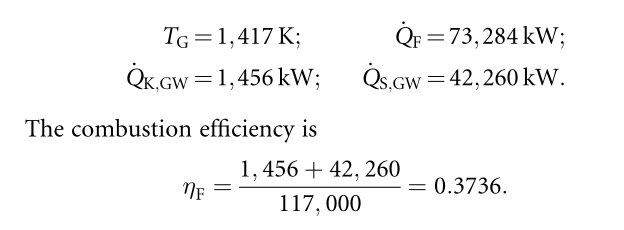